In [3]:
# Setup
import sys
import os
sys.path.append(os.path.abspath('..')) # Access project root from notebooks/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [6]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Setup complete!")

✅ Setup complete!


In [7]:
# Column names for C-MAPSS dataset
# 26 total columns:
# - engine_number: ID of the engine (1-100 in train)
# - cycle: time step (starts at 1, increases until failure)
# - setting_1, setting_2, setting_3: operational settings (altitude, mach, throttle)
# - sensor_1 to sensor_21: 21 sensor measurements

columns = (
    ["engine_number", "cycle"]
    + [f"setting_{i}" for i in range(1, 4)]
    + [f"sensor_{i}" for i in range(1, 22)]
)

print(f"Total columns: {len(columns)}")
print(f"Column names: {columns}")

Total columns: 26
Column names: ['engine_number', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [8]:
# Load train_FD001.txt
# File format: space-separated values, no header

data_path = "../data/raw/train_FD001.txt"

df_train = pd.read_csv(
    data_path,
    sep=r'\s+',           # whitespace separator (handles multiple spaces)
    header=None,          # no header row
    names=columns,        # assign our column names
    engine='python'       # use python engine for regex separator
)

print(f"✅ Loaded training data: {df_train.shape}")
print(f"   Rows: {df_train.shape[0]:,}")
print(f"   Columns: {df_train.shape[1]}")

✅ Loaded training data: (20631, 26)
   Rows: 20,631
   Columns: 26


In [9]:
# Display first few rows
print("First 5 rows:")
display(df_train.head())

print("\nLast 5 rows:")
display(df_train.tail())

print("\nData types:")
print(df_train.dtypes)

First 5 rows:


,engine_number,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044



Last 5 rows:


,engine_number,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,21.61,550.79,2388.26,9061.48,1.3,48.20,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522



Data types:
engine_number      int64
cycle              int64
setting_1        float64
setting_2        float64
setting_3        float64
sensor_1         float64
sensor_2         float64
sensor_3         float64
sensor_4         float64
sensor_5         float64
sensor_6         float64
sensor_7         float64
sensor_8         float64
sensor_9         float64
sensor_10        float64
sensor_11        float64
sensor_12        float64
sensor_13        float64
sensor_14        float64
sensor_15        float64
sensor_16        float64
sensor_17          int64
sensor_18          int64
sensor_19        float64
sensor_20        float64
sensor_21        float64
dtype: object


In [10]:
# Missing values
print("Missing values per column:")
missing = df_train.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✅ No missing values!")

# Duplicates
duplicates = df_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Data types - all should be numeric
print("\nNon-numeric columns:")
non_numeric = df_train.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric if non_numeric else "✅ All columns are numeric!")

Missing values per column:
✅ No missing values!

Duplicate rows: 0

Non-numeric columns:
✅ All columns are numeric!


In [11]:
# Summary statistics
print("Summary statistics for key columns:")
display(df_train[['engine_number', 'cycle', 'setting_1', 'sensor_2', 'sensor_7', 'sensor_14']].describe())

print("\nFull statistics:")
display(df_train.describe().T)  # Transposed for easier reading

Summary statistics for key columns:


,engine_number,cycle,setting_1,sensor_2,sensor_7,sensor_14
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,642.680934,553.367711,8143.752722
std,29.227633,68.880990,0.002187,0.500053,0.885092,19.076176
min,1.000000,1.000000,-0.008700,641.210000,549.850000,8099.940000
25%,26.000000,52.000000,-0.001500,642.325000,552.810000,8133.245000
50%,52.000000,104.000000,0.000000,642.640000,553.440000,8140.540000
75%,77.000000,156.000000,0.001500,643.000000,554.010000,8148.310000
max,100.000000,362.000000,0.008700,644.530000,556.060000,8293.720000



Full statistics:


,count,mean,std,min,25%,50%,75%,max
engine_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [12]:
# How many engines in training data?
n_engines = df_train['engine_number'].nunique()
print(f"Number of unique engines: {n_engines}")

# Engine ID range
print(f"Engine IDs: {df_train['engine_number'].min()} to {df_train['engine_number'].max()}")

# Cycles per engine
cycles_per_engine = df_train.groupby('engine_number')['cycle'].max()
print(f"\nCycles per engine (min/max/mean):")
print(f"  Min: {cycles_per_engine.min()}")
print(f"  Max: {cycles_per_engine.max()}")
print(f"  Mean: {cycles_per_engine.mean():.1f}")
print(f"  Median: {cycles_per_engine.median():.1f}")

Number of unique engines: 100
Engine IDs: 1 to 100

Cycles per engine (min/max/mean):
  Min: 128
  Max: 362
  Mean: 206.3
  Median: 199.0


✅ Saved: figures/eda_engine_lifetimes.png


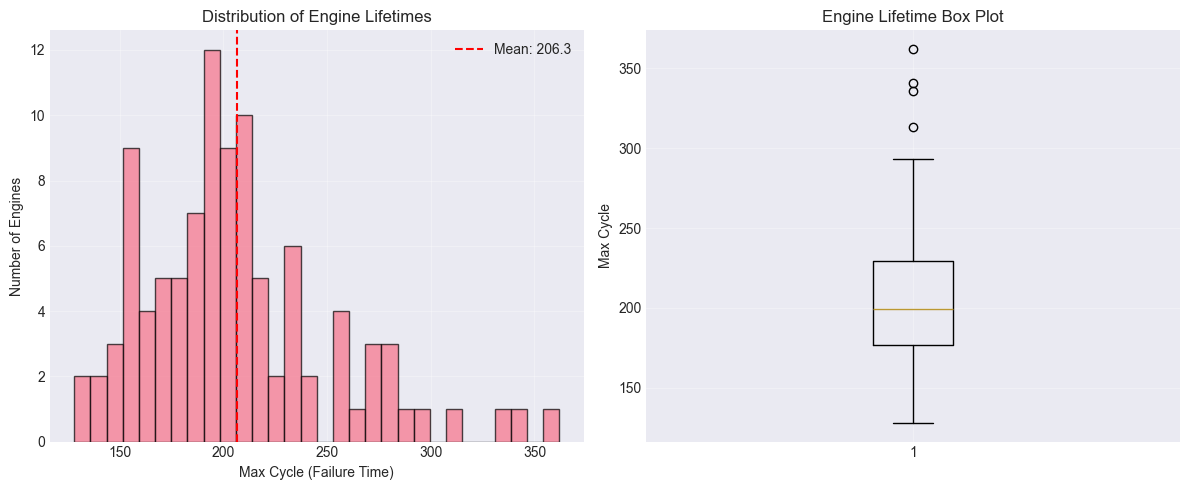

In [13]:
# Plot distribution of max cycles (failure times)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(cycles_per_engine, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Max Cycle (Failure Time)')
plt.ylabel('Number of Engines')
plt.title('Distribution of Engine Lifetimes')
plt.axvline(cycles_per_engine.mean(), color='red', linestyle='--', label=f'Mean: {cycles_per_engine.mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(cycles_per_engine, vert=True)
plt.ylabel('Max Cycle')
plt.title('Engine Lifetime Box Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/eda_engine_lifetimes.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/eda_engine_lifetimes.png")
plt.show()

In [14]:
# Look at one engine in detail
engine_id = 1
engine_data = df_train[df_train['engine_number'] == engine_id]

print(f"Engine {engine_id} details:")
print(f"  Total cycles: {engine_data['cycle'].max()}")
print(f"  Total records: {len(engine_data)}")
print(f"\nFirst 3 cycles:")
display(engine_data.head(3))
print(f"\nLast 3 cycles (before failure):")
display(engine_data.tail(3))

Engine 1 details:
  Total cycles: 192
  Total records: 192

First 3 cycles:


,engine_number,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442



Last 3 cycles (before failure):


,engine_number,cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649


In [15]:
# Calculate standard deviation for each column
std_dev = df_train.std()

print("Standard deviation of all columns:")
print(std_dev.sort_values())

print("\n" + "="*50)
print("Columns with very low variance (std < 0.001):")
low_variance_cols = std_dev[std_dev < 0.001].index.tolist()
print(low_variance_cols)

Standard deviation of all columns:
sensor_19        0.000000e+00
setting_3        0.000000e+00
sensor_1         0.000000e+00
sensor_18        0.000000e+00
sensor_10        0.000000e+00
sensor_16        1.387812e-17
sensor_5         1.776400e-15
setting_2        2.930621e-04
sensor_6         1.388985e-03
setting_1        2.187313e-03
sensor_15        3.750504e-02
sensor_8         7.098548e-02
sensor_13        7.191892e-02
sensor_21        1.082509e-01
sensor_20        1.807464e-01
sensor_11        2.670874e-01
sensor_2         5.000533e-01
sensor_12        7.375534e-01
sensor_7         8.850923e-01
sensor_17        1.548763e+00
sensor_3         6.131150e+00
sensor_4         9.000605e+00
sensor_14        1.907618e+01
sensor_9         2.208288e+01
engine_number    2.922763e+01
cycle            6.888099e+01
dtype: float64

Columns with very low variance (std < 0.001):
['setting_2', 'setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


✅ Saved: figures/eda_constant_sensors.png


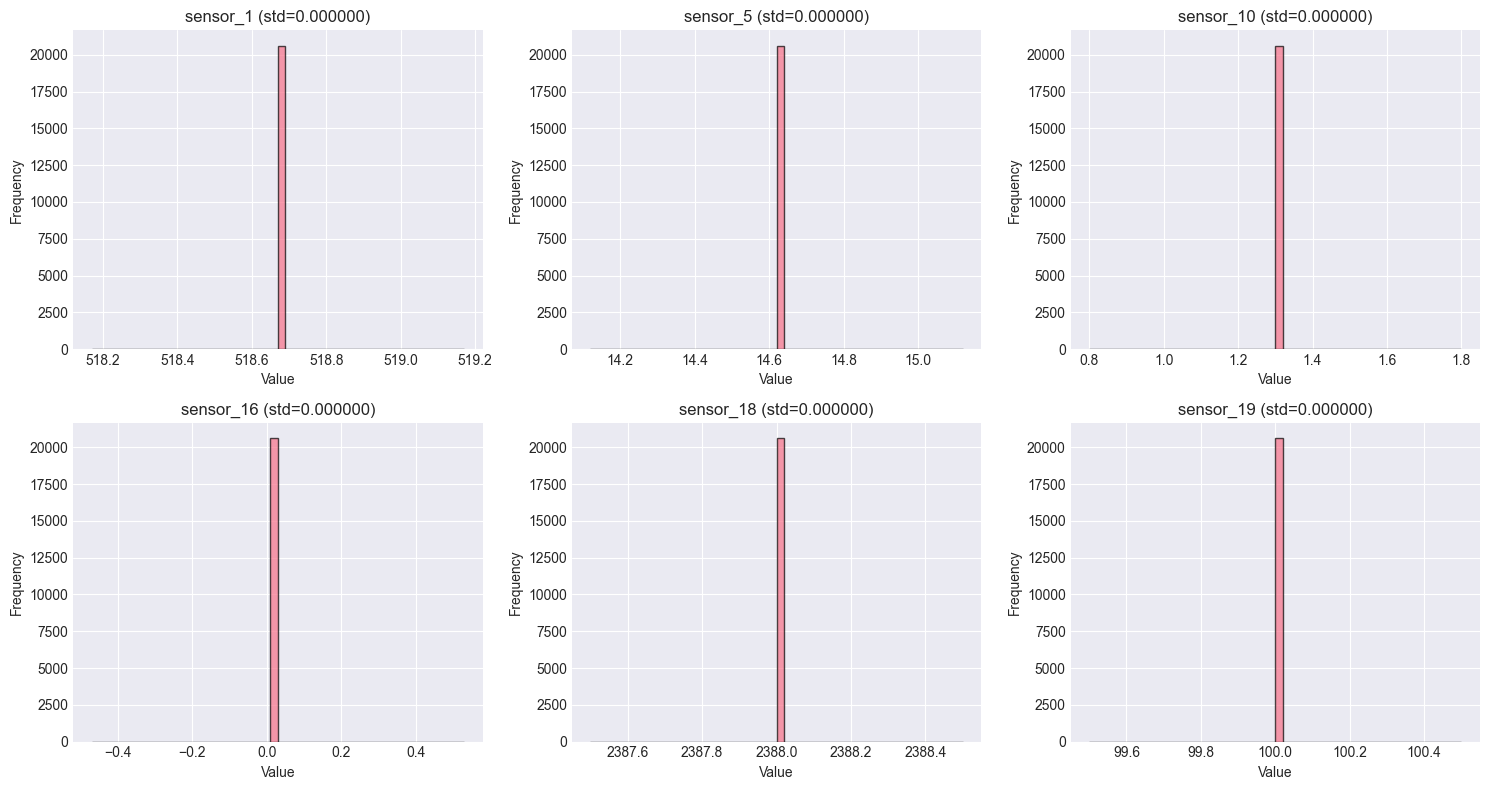


📝 Decision: These sensors will be DROPPED in preprocessing (no predictive value)


In [16]:
# Plot a few low-variance sensors
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

constant_sensors = ['sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']

for i, sensor in enumerate(constant_sensors):
    if i < 6:
        axes[i].hist(df_train[sensor], bins=50, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{sensor} (std={df_train[sensor].std():.6f})')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../figures/eda_constant_sensors.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/eda_constant_sensors.png")
plt.show()

print("\n📝 Decision: These sensors will be DROPPED in preprocessing (no predictive value)")

✅ Saved: figures/eda_single_engine_degradation.png


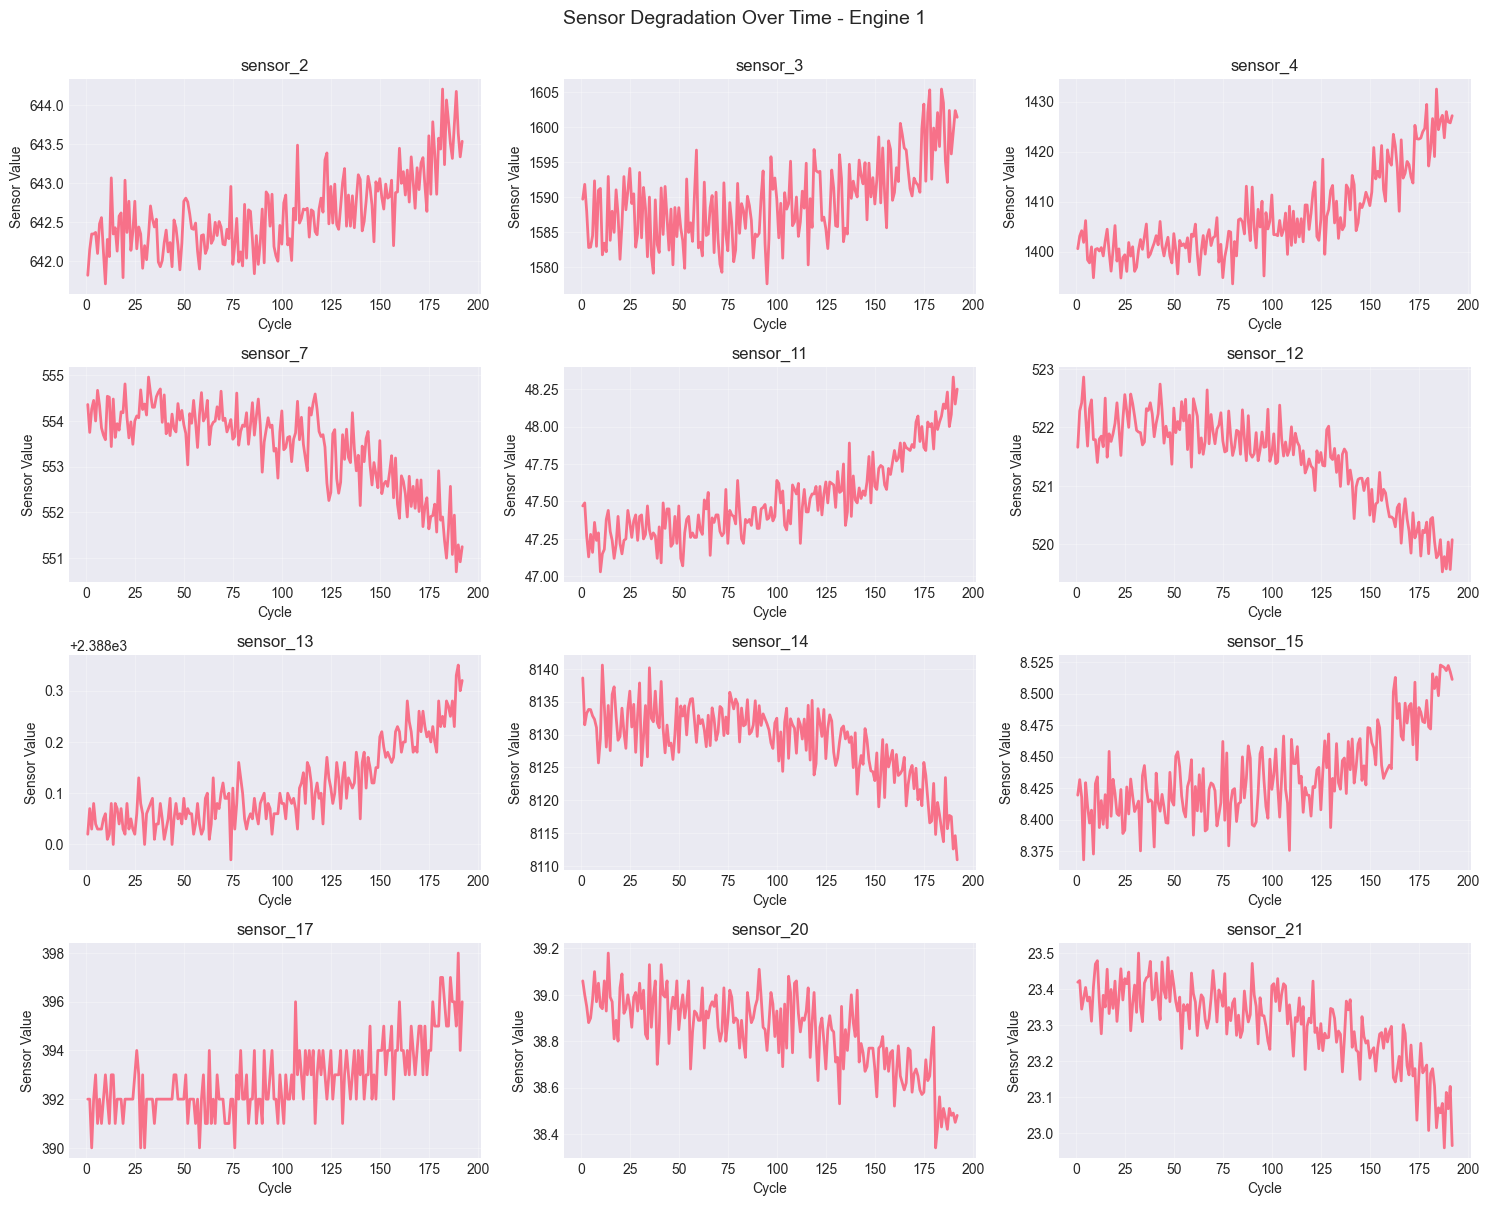

In [17]:
# Plot sensor values over time for one engine to see degradation
engine_id = 1
engine_data = df_train[df_train['engine_number'] == engine_id]

# Select interesting sensors (high variance)
interesting_sensors = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12', 
                       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, sensor in enumerate(interesting_sensors):
    axes[i].plot(engine_data['cycle'], engine_data[sensor], linewidth=2)
    axes[i].set_title(sensor)
    axes[i].set_xlabel('Cycle')
    axes[i].set_ylabel('Sensor Value')
    axes[i].grid(True, alpha=0.3)

plt.suptitle(f'Sensor Degradation Over Time - Engine {engine_id}', fontsize=14, y=1.001)
plt.tight_layout()
plt.savefig('../figures/eda_single_engine_degradation.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/eda_single_engine_degradation.png")
plt.show()

✅ Saved: figures/eda_multi_engine_comparison.png


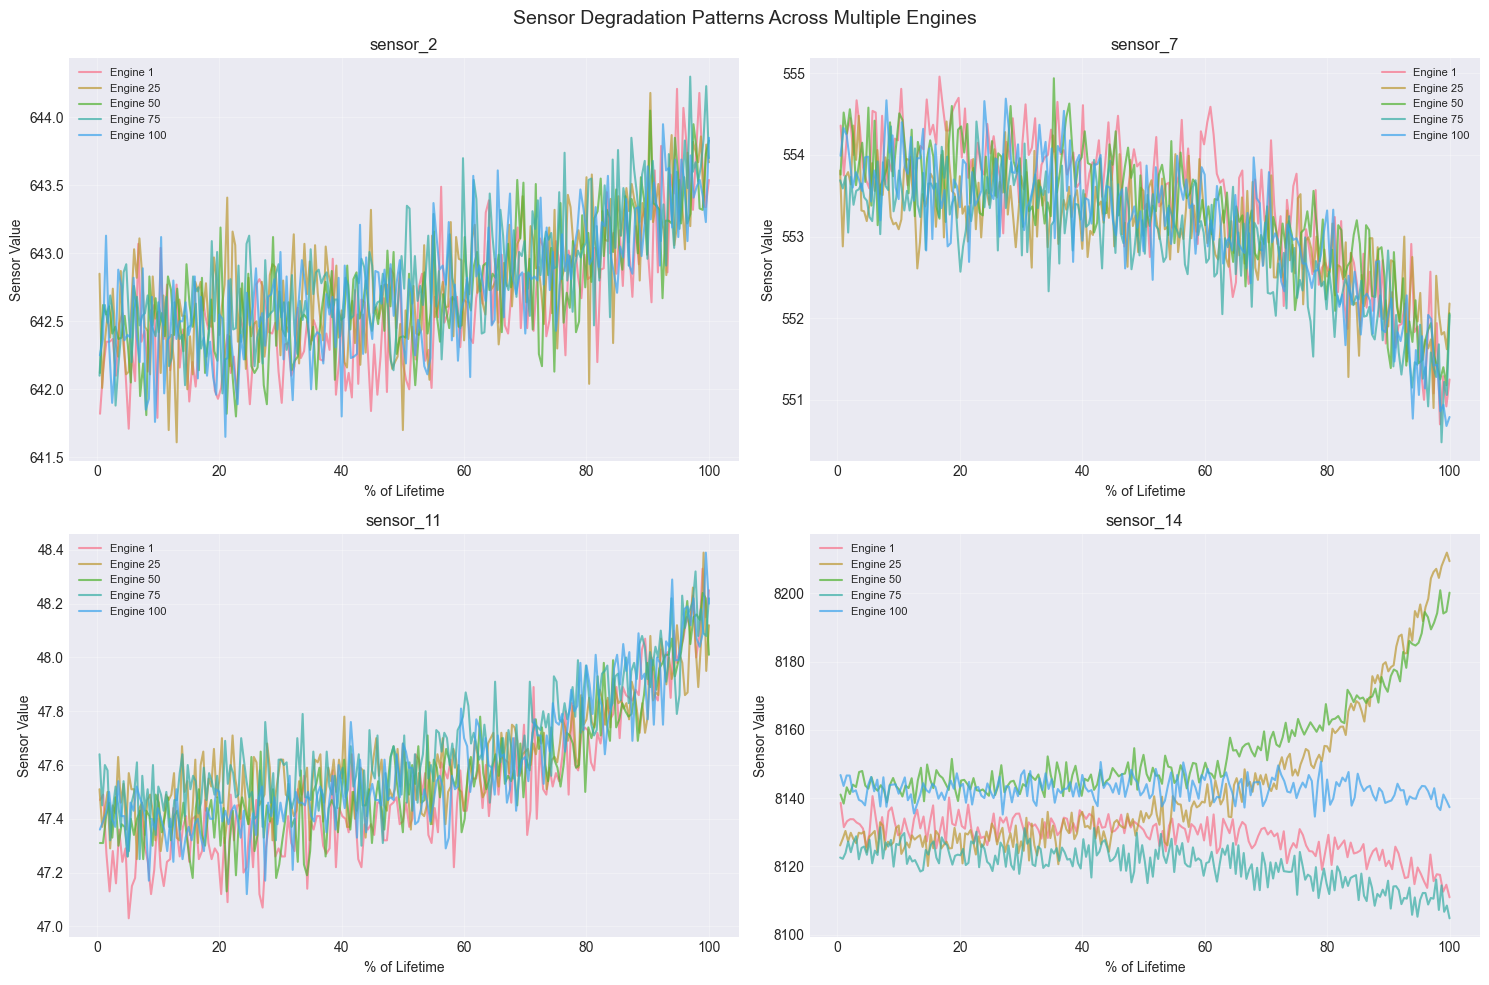

In [18]:
# Compare 5 different engines to see pattern consistency
sample_engines = [1, 25, 50, 75, 100]

plt.figure(figsize=(15, 10))

sensors_to_plot = ['sensor_2', 'sensor_7', 'sensor_11', 'sensor_14']

for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(2, 2, i)
    
    for engine_id in sample_engines:
        engine_data = df_train[df_train['engine_number'] == engine_id]
        # Normalize cycles to 0-100% of lifetime for comparison
        normalized_cycle = engine_data['cycle'] / engine_data['cycle'].max() * 100
        plt.plot(normalized_cycle, engine_data[sensor], label=f'Engine {engine_id}', alpha=0.7)
    
    plt.xlabel('% of Lifetime')
    plt.ylabel('Sensor Value')
    plt.title(sensor)
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)

plt.suptitle('Sensor Degradation Patterns Across Multiple Engines', fontsize=14)
plt.tight_layout()
plt.savefig('../figures/eda_multi_engine_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/eda_multi_engine_comparison.png")
plt.show()

✅ Saved: figures/eda_correlation_heatmap.png


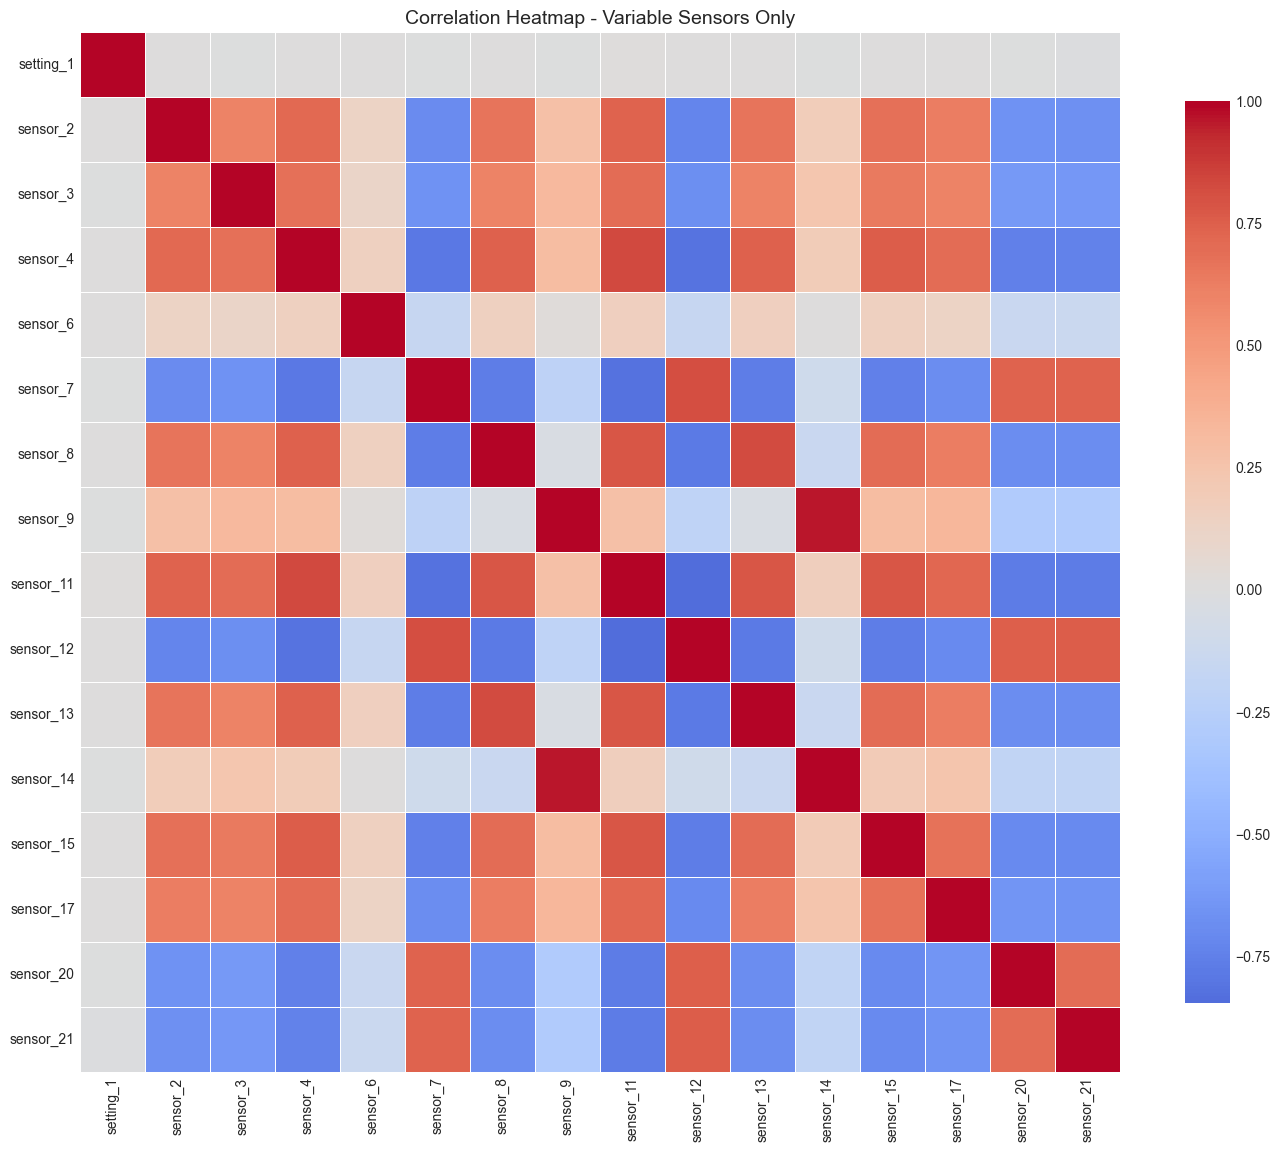


Highly correlated pairs (|correlation| > 0.9):
  sensor_9 <-> sensor_14: 0.963


In [19]:
# Select variable sensors only (drop constants + identifiers)
variable_cols = [col for col in df_train.columns 
                 if col not in ['engine_number', 'cycle'] + low_variance_cols]

# Calculate correlation matrix
correlation_matrix = df_train[variable_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0, 
            annot=False,  # Too many values to annotate
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Variable Sensors Only', fontsize=14)
plt.tight_layout()
plt.savefig('../figures/eda_correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/eda_correlation_heatmap.png")
plt.show()

print("\nHighly correlated pairs (|correlation| > 0.9):")
# Find highly correlated pairs
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

for col1, col2, corr in high_corr:
    print(f"  {col1} <-> {col2}: {corr:.3f}")

In [20]:
# RUL = Remaining Useful Life
# For each row: RUL = max_cycle_of_engine - current_cycle

# Calculate RUL for training data (temporary, just to understand distribution)
max_cycles = df_train.groupby('engine_number')['cycle'].max().reset_index()
max_cycles.columns = ['engine_number', 'max_cycle']

df_train_with_rul = df_train.merge(max_cycles, on='engine_number')
df_train_with_rul['RUL'] = df_train_with_rul['max_cycle'] - df_train_with_rul['cycle']

print("RUL statistics:")
print(df_train_with_rul['RUL'].describe())

print("\n5 example rows with RUL:")
display(df_train_with_rul[['engine_number', 'cycle', 'max_cycle', 'RUL']].head(10))

RUL statistics:
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

5 example rows with RUL:


,engine_number,cycle,max_cycle,RUL
0,1,1,192,191
1,1,2,192,190
2,1,3,192,189
3,1,4,192,188
4,1,5,192,187
5,1,6,192,186
6,1,7,192,185
7,1,8,192,184
8,1,9,192,183
9,1,10,192,182


✅ Saved: figures/eda_rul_distribution.png


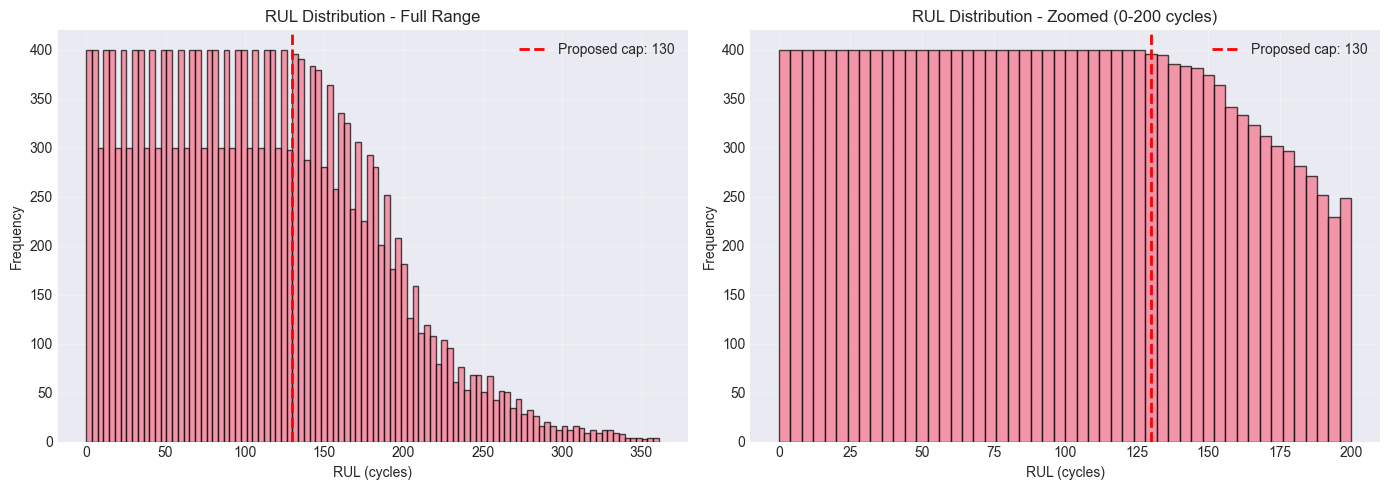


📊 36.5% of data has RUL > 130 cycles
   These will be capped at 130 (engines are 'healthy', exact RUL doesn't matter)


In [21]:
# Plot RUL distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_train_with_rul['RUL'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('RUL (cycles)')
plt.ylabel('Frequency')
plt.title('RUL Distribution - Full Range')
plt.axvline(130, color='red', linestyle='--', linewidth=2, label='Proposed cap: 130')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Zoom in to 0-200
rul_subset = df_train_with_rul[df_train_with_rul['RUL'] <= 200]['RUL']
plt.hist(rul_subset, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('RUL (cycles)')
plt.ylabel('Frequency')
plt.title('RUL Distribution - Zoomed (0-200 cycles)')
plt.axvline(130, color='red', linestyle='--', linewidth=2, label='Proposed cap: 130')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/eda_rul_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: figures/eda_rul_distribution.png")
plt.show()

# Percentage of data above 130
pct_above_130 = (df_train_with_rul['RUL'] > 130).sum() / len(df_train_with_rul) * 100
print(f"\n📊 {pct_above_130:.1f}% of data has RUL > 130 cycles")
print(f"   These will be capped at 130 (engines are 'healthy', exact RUL doesn't matter)")

# EDA Summary - Key Findings

## Dataset Overview
- **Training engines**: 100
- **Total records**: ~20,631 rows
- **Features**: 26 columns (2 IDs + 3 settings + 21 sensors)
- **Engine lifetimes**: 128-362 cycles (mean: ~206 cycles)

## Data Quality
- ✅ No missing values
- ✅ No duplicates
- ✅ All numeric data

## Sensor Analysis

### Constant Sensors (to DROP):
- `sensor_1`, `sensor_5`, `sensor_10`, `sensor_16`, `sensor_18`, `sensor_19`
- **Reason**: Near-zero variance → no predictive value

### Variable Sensors (to KEEP):
- `sensor_2`, `sensor_3`, `sensor_4`, `sensor_7`, `sensor_11`, `sensor_12`, 
  `sensor_13`, `sensor_14`, `sensor_15`, `sensor_17`, `sensor_20`, `sensor_21`
- **Notable**: `sensor_2`, `sensor_7`, `sensor_11`, `sensor_14` show clear degradation trends

## Key Insights
1. **Degradation patterns are consistent** across engines → model should generalize
2. **Some sensors highly correlated** (e.g., sensor_4 & sensor_12) → multicollinearity expected
3. **RUL distribution is skewed** → many healthy engines (RUL > 130)

## Preprocessing Decisions
1. ✅ **Drop 6 constant sensors**
2. ✅ **Cap RUL at 130 cycles** (treat all RUL > 130 as "healthy")
3. ✅ **Keep 3 settings + 15 variable sensors** = 18 base features
4. ✅ **Add rolling/lag features** in Phase 4 (target: ~120 total features)

## Next Steps
- **Phase 3**: Implement preprocessing (drop constants, add RUL, cap at 130)
- **Phase 4**: Feature engineering (rolling stats, lags)

In [22]:
# Create summary dictionary for documentation
eda_summary = {
    'n_engines': n_engines,
    'total_records': len(df_train),
    'n_columns': len(df_train.columns),
    'min_lifetime': cycles_per_engine.min(),
    'max_lifetime': cycles_per_engine.max(),
    'mean_lifetime': cycles_per_engine.mean(),
    'constant_sensors': low_variance_cols,
    'n_constant_sensors': len(low_variance_cols),
    'rul_cap_threshold': 130,
    'pct_above_cap': pct_above_130
}

print("EDA Summary Statistics:")
for key, value in eda_summary.items():
    print(f"  {key}: {value}")

# Save to file for reference
import json
with open('../figures/eda_summary.json', 'w') as f:
    # Convert numpy types to native Python types
    summary_clean = {k: (int(v) if isinstance(v, (np.integer, np.int64)) else 
                        float(v) if isinstance(v, (np.floating, np.float64)) else v) 
                     for k, v in eda_summary.items()}
    json.dump(summary_clean, f, indent=2)

print("\n✅ Saved: figures/eda_summary.json")

EDA Summary Statistics:
  n_engines: 100
  total_records: 20631
  n_columns: 26
  min_lifetime: 128
  max_lifetime: 362
  mean_lifetime: 206.31
  constant_sensors: ['setting_2', 'setting_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']
  n_constant_sensors: 8
  rul_cap_threshold: 130
  pct_above_cap: 36.51786147060249

✅ Saved: figures/eda_summary.json


In [23]:
# List all figures created
import os
figures_dir = '../figures/'
figures = [f for f in os.listdir(figures_dir) if f.endswith('.png') or f.endswith('.json')]

print("Saved figures and files:")
for fig in sorted(figures):
    file_path = os.path.join(figures_dir, fig)
    file_size = os.path.getsize(file_path) / 1024  # KB
    print(f"  ✅ {fig} ({file_size:.1f} KB)")

print(f"\nTotal: {len(figures)} files")

Saved figures and files:
  ✅ eda_constant_sensors.png (225.8 KB)
  ✅ eda_correlation_heatmap.png (213.9 KB)
  ✅ eda_engine_lifetimes.png (121.0 KB)
  ✅ eda_multi_engine_comparison.png (2242.3 KB)
  ✅ eda_rul_distribution.png (134.6 KB)
  ✅ eda_single_engine_degradation.png (1280.8 KB)
  ✅ eda_summary.json (0.4 KB)
  ✅ feature_eng_correlation.png (203.8 KB)
  ✅ feature_eng_lag_features.png (498.2 KB)
  ✅ feature_eng_rolling_mean.png (417.5 KB)
  ✅ feature_eng_rolling_std.png (513.1 KB)
  ✅ model_comparison.png (158.3 KB)
  ✅ model_feature_importance.png (185.7 KB)
  ✅ model_lr_predictions.png (679.9 KB)
  ✅ model_residuals.png (1520.6 KB)
  ✅ model_results.json (0.8 KB)
  ✅ model_rf_predictions.png (744.2 KB)
  ✅ model_ridge_predictions.png (160.9 KB)
  ✅ model_ridge_tuning.png (142.7 KB)
  ✅ model_test_predictions.png (247.4 KB)
  ✅ preprocessing_rul_capping.png (233.8 KB)
  ✅ preprocessing_train_test_distributions.png (327.7 KB)
  ✅ scaling_effect.png (360.0 KB)
  ✅ scaling_target_dis